# Actividad 2 - Titanic

### Bibliotecas

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Leer dataset

In [114]:
data = (r"C:\Users\esteb\OneDrive\Documents\GitHub\iteso-data-analytics\Datos\titanic.csv")
df = pd.read_csv(data)

In [115]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Sobrevivientes y fallecidos

In [116]:
cantidad = len(df)
cantidad

891

In [117]:
vivos = len(df[df['Survived'] == 1])
fallecidos = len(df[df['Survived'] != 1])

print(vivos)
print(fallecidos)

342
549


In [118]:
survived_counts = [vivos, fallecidos]

Text(0.5, 1.0, 'Proporción de Supervivientes')

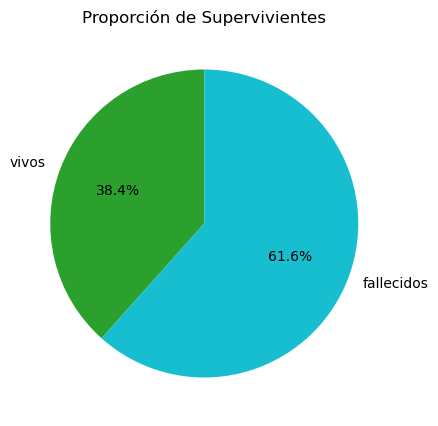

In [119]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.pie(survived_counts, labels=['vivos', 'fallecidos'], autopct='%1.1f%%', startangle=90, colors=['C2', 'C9'])
ax.set_title('Proporción de Supervivientes')


### Media, Mediana y moda del boleto

In [120]:
mean = df["Fare"].mean()
median = df["Fare"].median()
mode = df["Fare"].mode()

print("La media del costo de los tickets es",mean)
print("La mediana del costo de los tickets es",median)
print("La moda del costo de los tickets es",mode)

La media del costo de los tickets es 32.204207968574636
La mediana del costo de los tickets es 14.4542
La moda del costo de los tickets es 0    8.05
Name: Fare, dtype: float64


### Pagos de boleto (Valores atípicos / Anomalías)

In [121]:
cuartiles = df["Fare"].quantile([0.25, 0.75])
print(cuartiles)

0.25     7.9104
0.75    31.0000
Name: Fare, dtype: float64


In [122]:
range_inter = df["Fare"].quantile(0.75) - df["Fare"].quantile(0.25)
range_inter

23.0896

In [123]:
atipicos_menores = (df["Fare"].quantile(0.25)) - range_inter * 1.5
atipicos_mayores = (df["Fare"].quantile(0.75)) + range_inter * 1.5
print(atipicos_menores)
print(atipicos_mayores)


-26.724
65.6344


In [124]:
mayor = len(df[df['Fare']>atipicos_mayores])
mayor

116

In [125]:
menor = len(df[df['Fare']<atipicos_menores])
menor

0

In [126]:
print(mayor, "personas pagaron por boletos con un precio exagerado")

116 personas pagaron por boletos con un precio exagerado


<Axes: xlabel='Fare'>

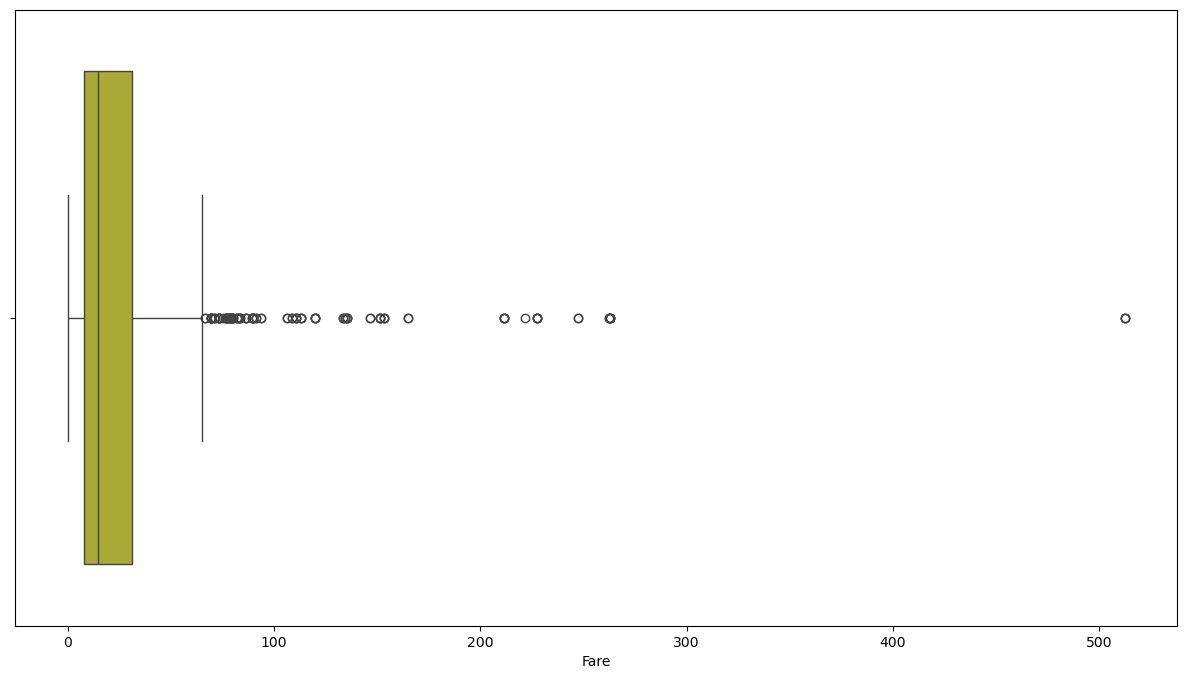

In [127]:
ax, fig = plt.subplots(figsize=(15, 8))

sns.boxplot(df['Fare'], orient='h', color='C8')

### Varianza de edades

In [128]:
varianza = df["Age"].var()
print("La varianza de edades de los pasajeros del Titanic es de", varianza, "lo que nos da una gran dispersión de edades entre los pasajeros")

La varianza de edades de los pasajeros del Titanic es de 211.0191247463081 lo que nos da una gran dispersión de edades entre los pasajeros


In [129]:
range_inter1 = df["Age"].quantile(0.75) - df["Age"].quantile(0.25)

atipicos_menores1 = (df["Age"].quantile(0.25)) - range_inter1 * 1.5
atipicos_mayores1 = (df["Age"].quantile(0.75)) + range_inter1 * 1.5

edades_menores = len(df[df['Age']<atipicos_menores1])
edades_mayores = len(df[df['Age']>atipicos_mayores1])

print("Abordaron", edades_menores, "personas con edades exageradamente menores")
print("Abordaron", edades_mayores, "personas con edades exageradamente mayores")

Abordaron 0 personas con edades exageradamente menores
Abordaron 11 personas con edades exageradamente mayores


<Axes: xlabel='Age'>

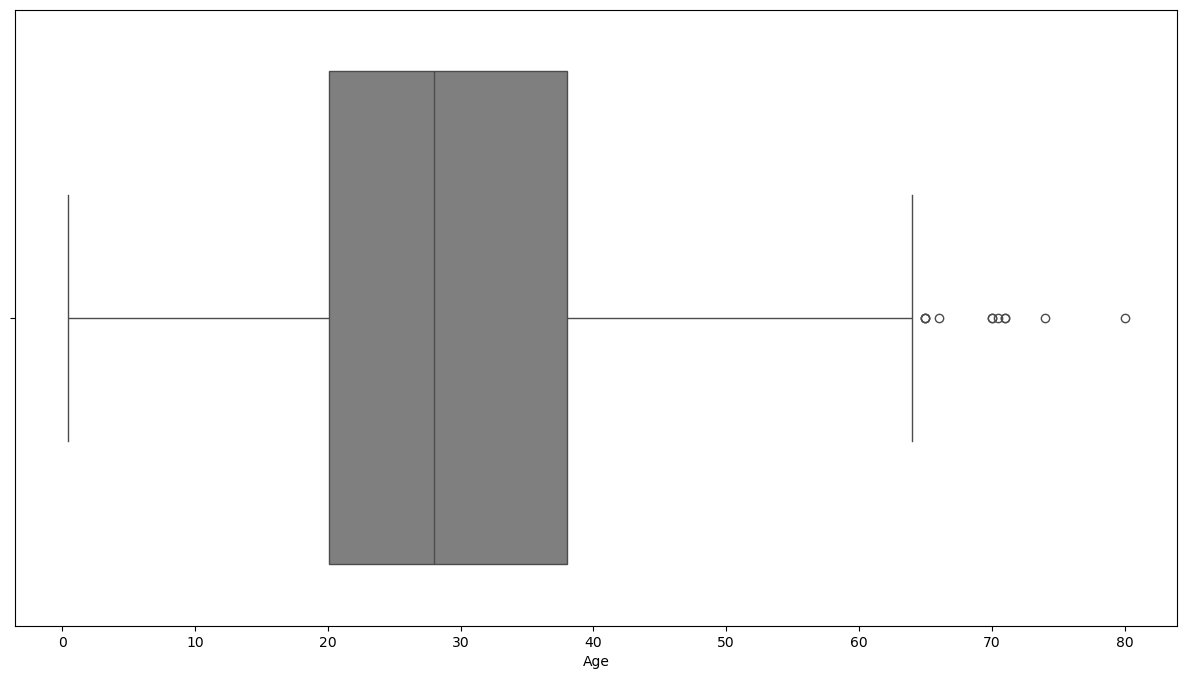

In [130]:
ax, fig = plt.subplots(figsize=(15, 8))

sns.boxplot(df['Age'], orient='h', color='C7')

### Probabilidad de sobrevivir entre mujer de 40 y hombre de 70

In [131]:
H70 = df[(df["Sex"] == 'male') & (df['Age'] == 70)]
M40 = df[(df["Sex"] == 'female') & (df['Age'] == 40)]

meanH70 = H70["Survived"].mean()
meanM40 = M40["Survived"].mean()

print(meanH70)
print(meanM40)
print("La probabilidad de que una mujer de 40 años sobreviva es mayor a la de un hombre de 70 años")

0.0
0.8333333333333334
La probabilidad de que una mujer de 40 años sobreviva es mayor a la de un hombre de 70 años


In [132]:
"Es más probable "

'Es más probable '

### Distribución de edades con respecto a si sobrevivió o no el pasajero

In [133]:
df_edad = df[["Age", "Survived"]]
df_edad.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


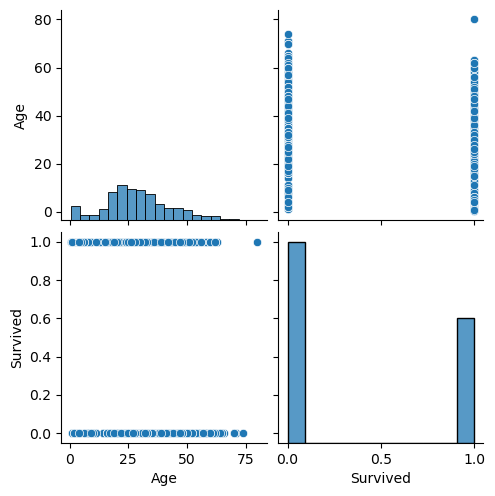

In [134]:
sns.pairplot(df_edad,)

In [135]:
print("Podemos observar que en el suceso del Titanic fallecieron personas de todas las edades")

Podemos observar que en el suceso del Titanic fallecieron personas de todas las edades


### Distribución de sexo con respecto a si sobrevivió o no el pasajero

In [136]:
df_sexo = df[["Sex", "Survived"]]
df_sexo.head()

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [137]:
hombre = 0
mujer = 0

for i in df["Sex"]:
    if i == "female":
        mujer += 1
    else:
        hombre += 1

print("Al Titanic abordaron", mujer, "mujeres y", hombre, "hombres")

Al Titanic abordaron 314 mujeres y 577 hombres


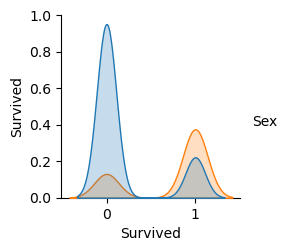

In [145]:
sns.pairplot(df_sexo, hue = "Sex")

In [146]:
print("Podemos observar que en el Titanic la mayor cantidad de fallecidos fueron hombres")
print("Podemos también observar que sobrevivieron más mujeres de las que fallecieron")

Podemos observar que en el Titanic la mayor cantidad de fallecidos fueron hombres
Podemos también observar que sobrevivieron más mujeres de las que fallecieron


In [147]:
HF = df[(df["Sex"] == 'male') & (df['Survived'] == 0)]
HF1 = HF['Survived'].count()
MF = df[(df["Sex"] == 'female') & (df['Survived'] == 0)]
MF1 = MF['Survived'].count()
HS = df[(df["Sex"] == 'male') & (df['Survived'] == 1)]
HS1 = HS['Survived'].count()
MS = df[(df["Sex"] == 'female') & (df['Survived'] == 1)]
MS1 = MS['Survived'].count()

print("En el Titanic fallecieron", HF1, "hombres y", MF1, "mujeres")
print("sobrevivieron", HS1, "hombres y", MS1, "mujeres")


En el Titanic fallecieron 468 hombres y 81 mujeres
sobrevivieron 109 hombres y 233 mujeres
